In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import t
import random
from scipy.ndimage import uniform_filter1d

Датасет для прогнозирования цен на квартиру

In [15]:
df = pd.read_csv("train.csv")
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


df.isna().sum()

Характеристики для каждого из числовых столбцов

In [6]:
numeric_columns = ['BHK_NO.', 'SQUARE_FT', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)']
categorial_columns = df.drop(columns = numeric_columns).columns.tolist()

In [18]:
df[numeric_columns].describe()

,BHK_NO.,SQUARE_FT,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000
mean,2.392279,1.980217e+04,21.300255,76.837695,142.898746
std,0.879091,1.901335e+06,6.205306,10.557747,656.880713
min,1.000000,3.000000e+00,-37.713008,-121.761248,0.250000
25%,2.000000,9.000211e+02,18.452663,73.798100,38.000000
50%,2.000000,1.175057e+03,20.750000,77.324137,62.000000
75%,3.000000,1.550688e+03,26.900926,77.828740,100.000000
max,20.000000,2.545455e+08,59.912884,152.962676,30000.000000


# 2.Аппроксимация распределения данных с помощью ядерных оценок

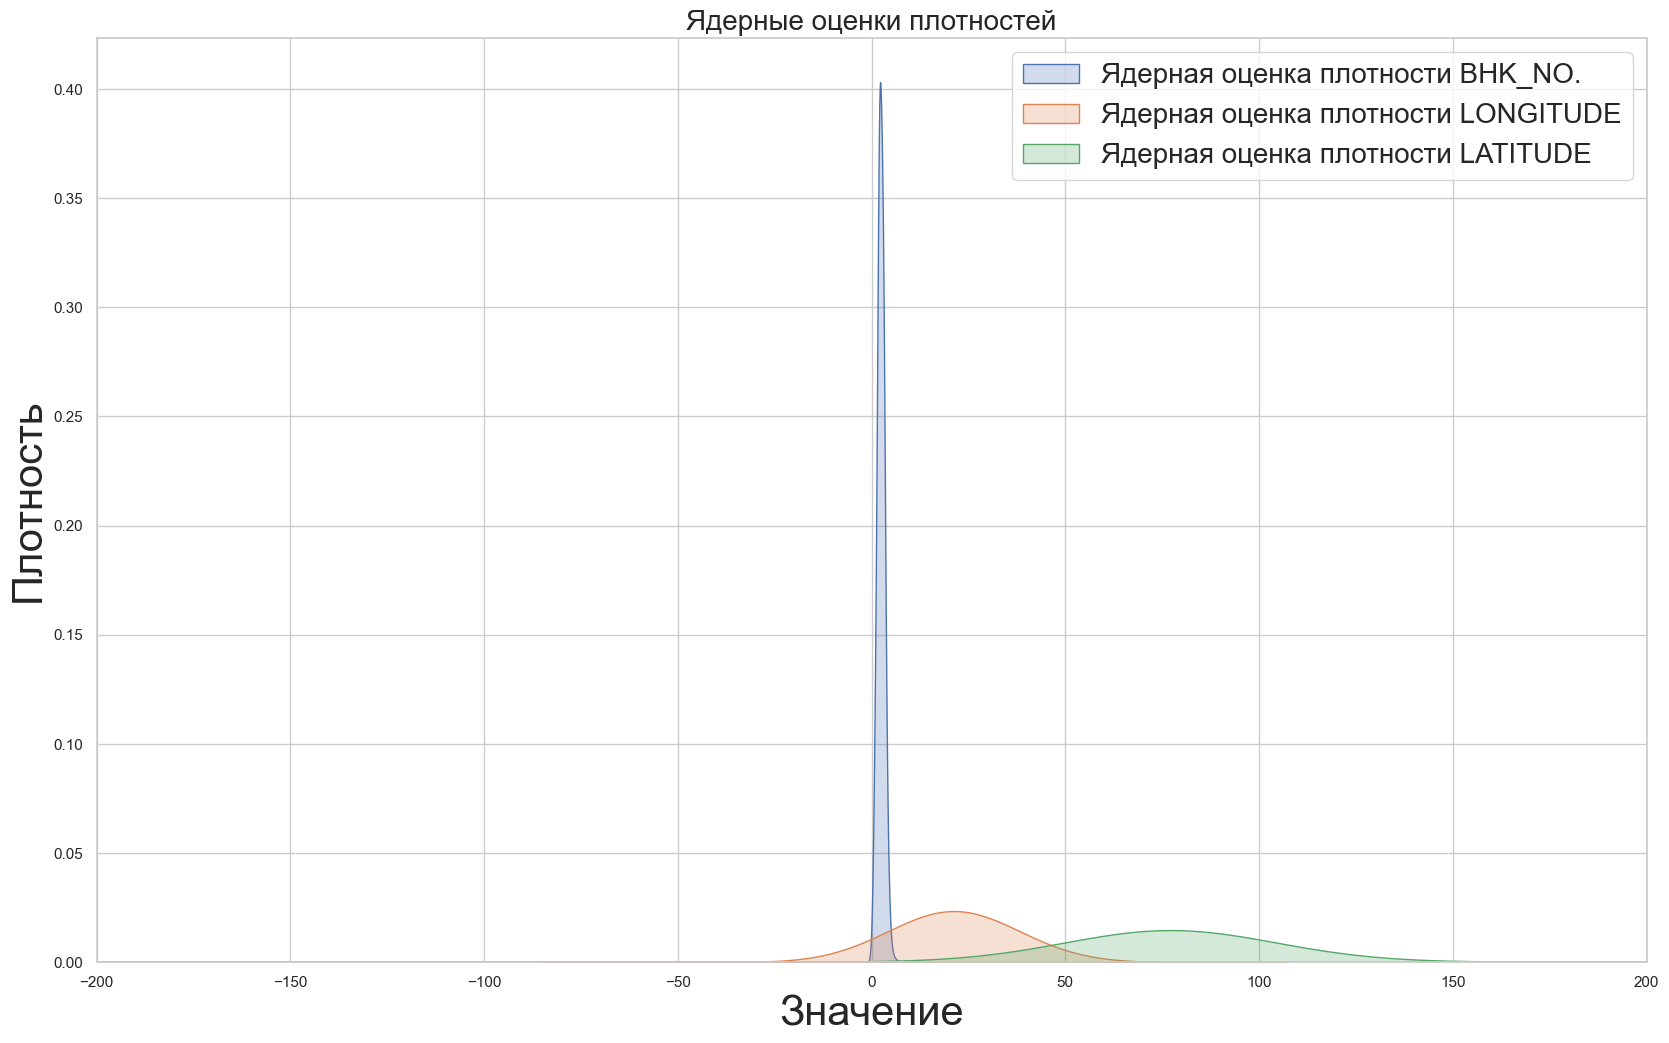

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))
sns.kdeplot(df[numeric_columns[0]], bw_adjust=5, fill=True, label=f'Ядерная оценка плотности {numeric_columns[0]}')
sns.kdeplot(df[numeric_columns[2]], bw_adjust=20, fill=True, label=f'Ядерная оценка плотности {numeric_columns[2]}')
sns.kdeplot(df[numeric_columns[3]], bw_adjust=20, fill=True, label=f'Ядерная оценка плотности {numeric_columns[3]}')
plt.xlim(-200, 200)
plt.title(f'Ядерные оценки плотностей', fontsize=20)
plt.xlabel('Значение', fontsize=30)
plt.ylabel('Плотность', fontsize=30)
plt.legend(fontsize = 20) 
plt.grid(True)
plt.show()

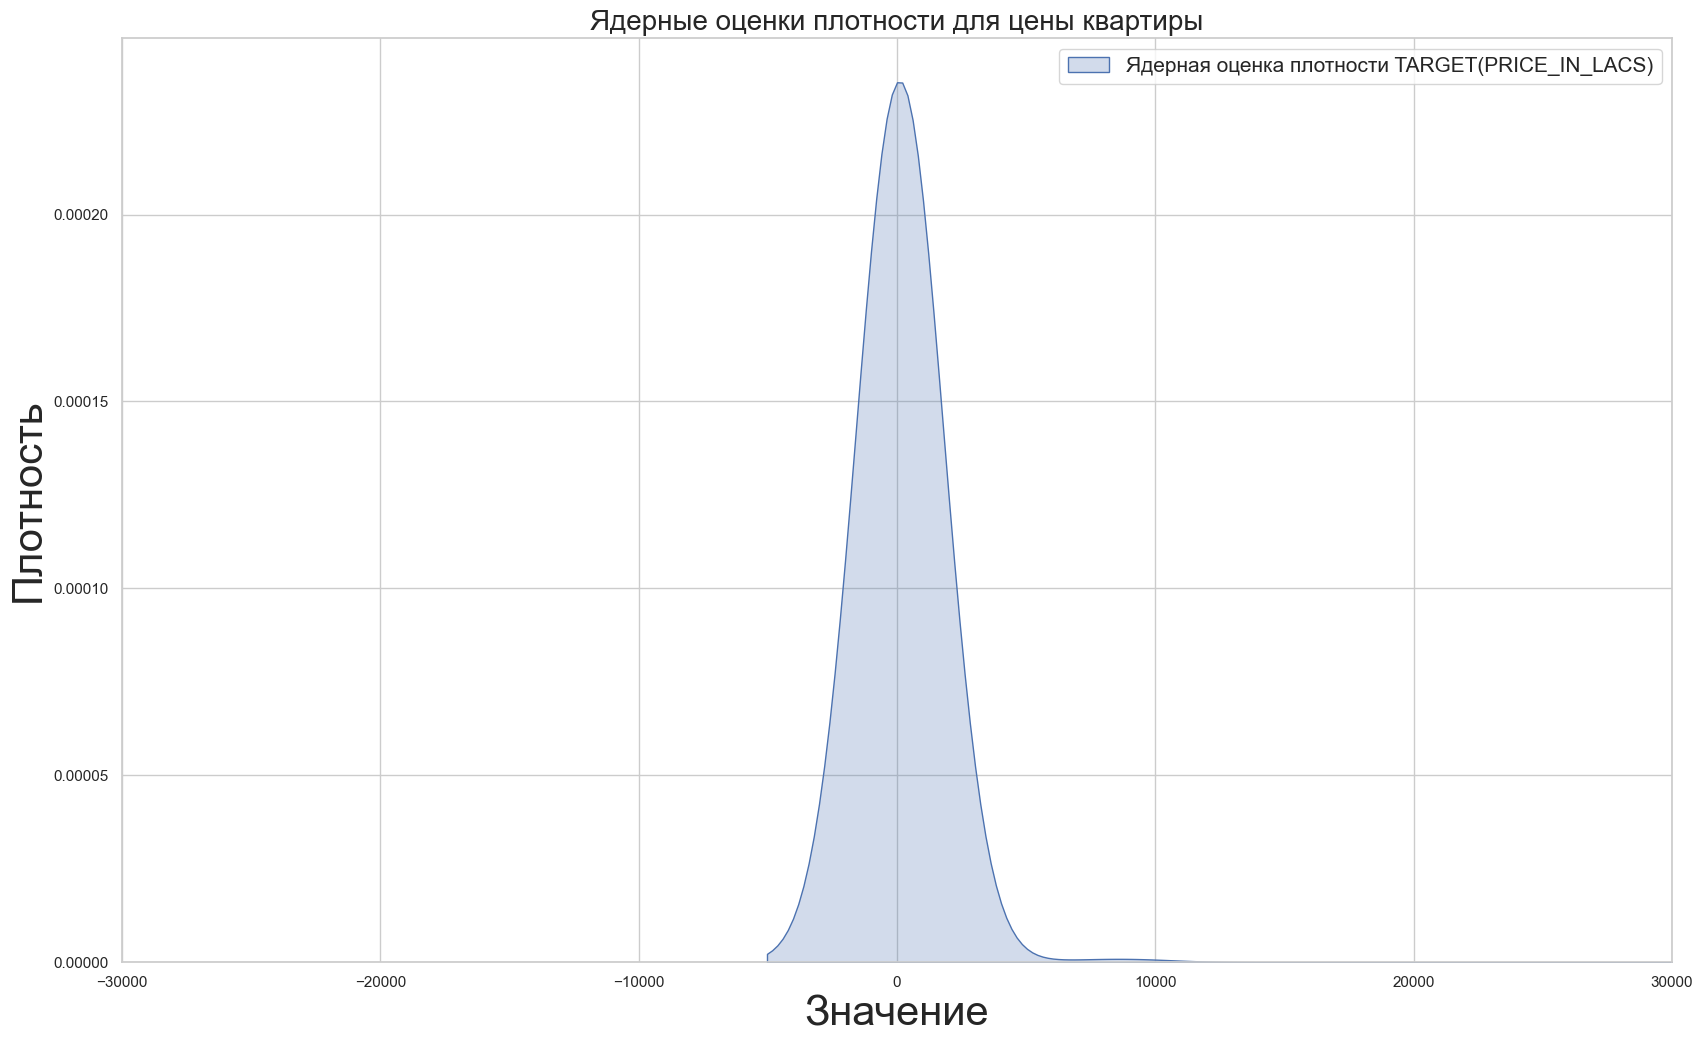

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))
sns.kdeplot(df[numeric_columns[4]], bw_adjust=20, fill=True, label=f'Ядерная оценка плотности {numeric_columns[4]}')
plt.xlim(-30000, 30000)
plt.title(f'Ядерные оценки плотности для цены квартиры', fontsize=20)
plt.xlabel('Значение', fontsize=30)
plt.ylabel('Плотность', fontsize=30)
plt.legend(fontsize=15) 
plt.grid(True)
plt.show()

# 3.Реализация Cdplot как зависимость цены квартиры от количества комнат 

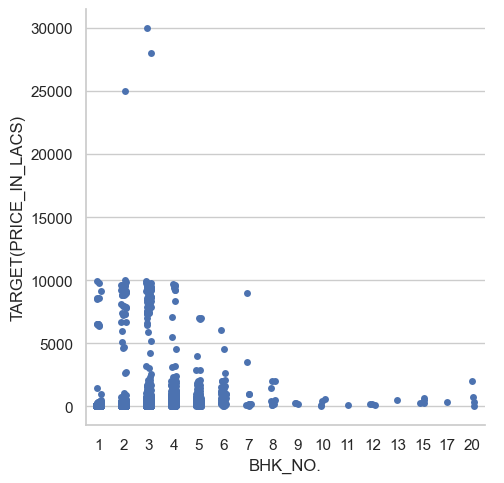

In [22]:
sns.catplot(x = numeric_columns[0], y = numeric_columns[-1], data=df)

# 3.Реализация dotchart как зависимость цены квартиры от её размера

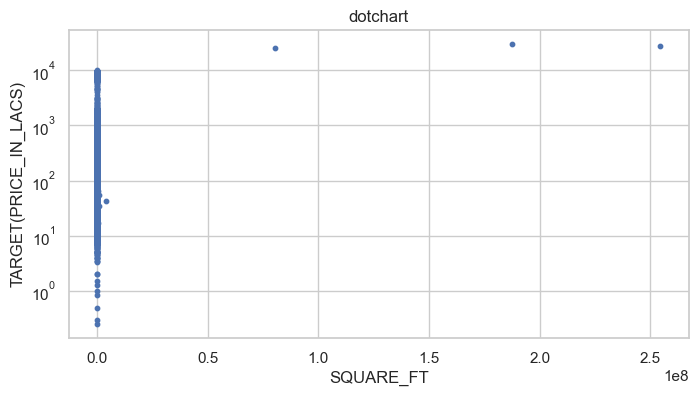

In [8]:
plt.figure(figsize=(8, 4))
plt.scatter(df.loc[: , numeric_columns[1]], df.loc[:, numeric_columns[-1]], s=10)
plt.title('dotchart')
plt.yscale('log')
plt.ylabel(numeric_columns[-1])
plt.xlabel(numeric_columns[1])
plt.show()

# 3.Реализация boxplot, например, для долгот и широт квартир и количества комнат в датасете

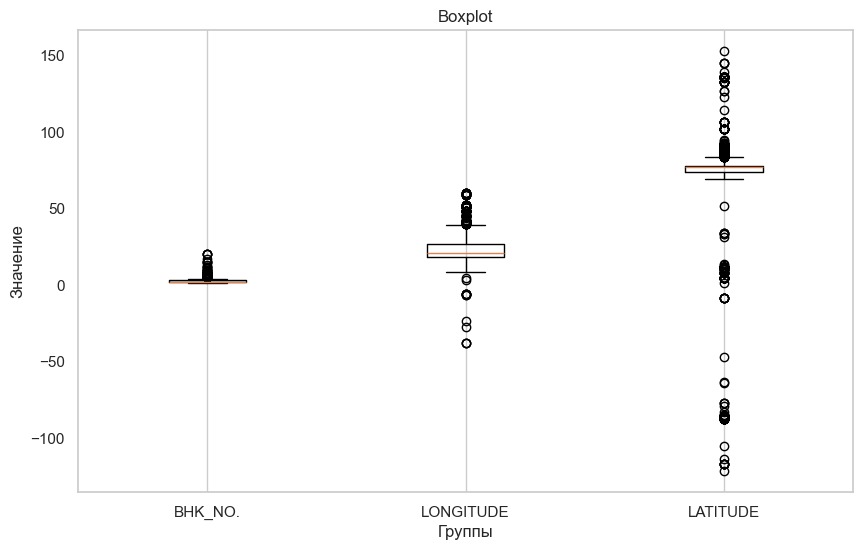

In [24]:
plt.figure(figsize=(10, 6))
plt.boxplot(df[numeric_columns].drop(columns = ['SQUARE_FT' , 'TARGET(PRICE_IN_LACS)']), tick_labels=[i for i in numeric_columns if (i != 'SQUARE_FT' and i != 'TARGET(PRICE_IN_LACS)')])
plt.title('Boxplot')
plt.ylabel('Значение')
plt.xlabel('Группы')
plt.grid(axis='y')
plt.show()


# 3.Stripchart, для визуализации зависимости размера квартиры от количества комнат в логарифмической шкале


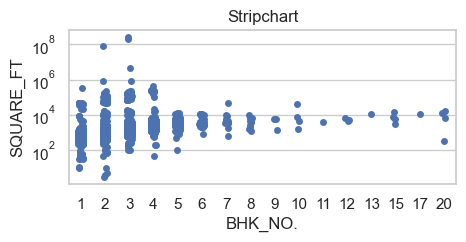

In [25]:
plt.figure(figsize=(5,2))
sns.stripplot(x = numeric_columns[0], y = numeric_columns[1], data = df, jitter=True)
plt.yscale('log')
plt.title('Stripchart')
plt.xlabel(numeric_columns[0])
plt.ylabel(numeric_columns[1])
plt.show()

# 4.Проверка наблюдений с помощью критерия Граббса, Q-теста Диксона на нормальных сгенерированных данных

### Для визуализации выбросов я использовал boxplot

In [12]:
def grabbs_test(data, alpha=0.05):
    n = len(data)
    
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    
    x_max = np.max(data)
    
    G = (x_max - mean) / std_dev
    
    t_critical = stats.t.ppf(1 - alpha, n - 1)
    G_critical = (n - 1) / np.sqrt(n) * np.sqrt((t_critical**2) / (n - 2 + t_critical**2))
    
    is_outlier = G > G_critical
    if is_outlier:
        print(f'G = {G}, G_critical = {G_critical}, значение {np.max(data)} выброс')
    else:
        print('Максимальное значение не является выбросом')

In [10]:
def dickeys_q_test(data):
    data = np.sort(data)
    n = len(data)

    Q_low = (data[1] - data[0]) / (data[-1] - data[0])
    Q_high = (data[-1] - data[-2]) / (data[-1] - data[0])

    critical_values = {
      10: (0.5, 0.2)
    }
    critical_low = critical_values[10][0]
    critical_high = critical_values[10][1]

    if Q_low < critical_low:
        print(f"Наблюдение {data[0]} является выбросом")
    if Q_high < critical_high:
        print(f"Наблюдение {data[-1]} является выбросом")

Критерий Граббса
Результаты для data1: G = 2.750894243396871, G_critical = 1.6412876605405615, значение 184.876117676073 выброс
Результаты для data2: G = 2.7850743835340923, G_critical = 1.6412876605405615, значение 161.3977742213169 выброс
Q-тест Диксона
Результаты для data1: Наблюдение -107.00392605992675 является выбросом
Наблюдение 184.876117676073 является выбросом
Результаты для data2: Наблюдение -95.17666822433239 является выбросом
Наблюдение 161.3977742213169 является выбросом


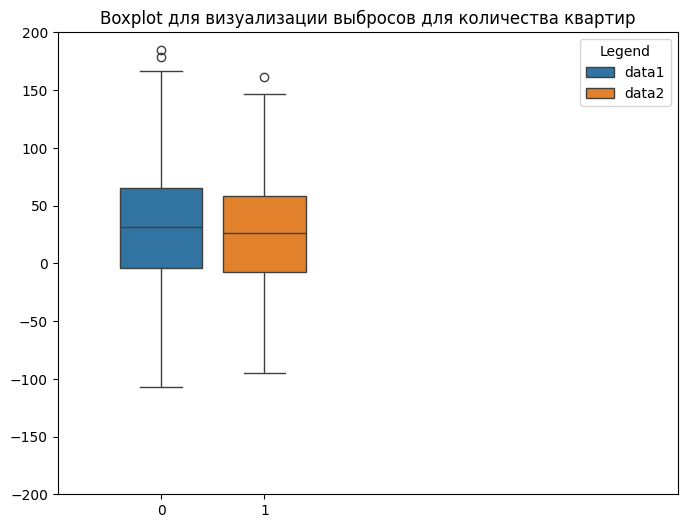

In [14]:
data1 = np.random.normal(30,60, 200)
data2 = np.random.normal(20,50, 200)
print('Критерий Граббса')
print('Результаты для data1: ',end='')
grabbs_test(data1)
print('Результаты для data2: ',end='')
grabbs_test(data2)
print('Q-тест Диксона')
print('Результаты для data1: ',end='')
dickeys_q_test(data1)
print('Результаты для data2: ',end='')
dickeys_q_test(data2)



plt.figure(figsize=(8, 6))
sns.boxplot([data1, data2])
plt.ylim(-200,200)
plt.xlim(-1, 5)
plt.title('Boxplot для визуализации выбросов для количества квартир')
plt.legend(['data1', 'data2'], title='Legend')
plt.show()

# Сравнение значений для изменённых данных и исходных. 
### Значения не сильно отличаются, например, немного изменилось среднее значение и стандартное отклонение у TARGET(PRICE_IN_LACS)

In [12]:
random_index = random.choices(df.index.to_list(), k = 20)
df_example = df.copy()
df_example.loc[random_index, numeric_columns] = np.nan
df_example.loc[random_index, numeric_columns] = df_example.loc[random_index, numeric_columns].fillna(df_example.loc[:, numeric_columns].mean())
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [13]:
df_example.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392172,1.981456e+04,0.820244,0.929578,21.300475,76.837137,142.916988
std,0.383991,0.465675,0.878638,1.901335e+06,0.383991,0.255861,6.203674,10.557007,656.871577
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000243e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175122e+03,1.000000,1.000000,20.788326,77.323900,62.000000
75%,0.000000,1.000000,3.000000,1.552680e+03,1.000000,1.000000,26.900926,77.815069,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


# Анализ с помощью графиков эмпирических функций распределений, квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности

In [4]:
def distribution(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

In [10]:
def normality_analysis(data, sample_size):
    print(f"Объем выборки: {sample_size}")
    
    tests = {
        "Колмогорова-Смирнова": stats.kstest(data, 'norm', args=(np.mean(data), np.std(data))),
        "Критерий Шапиро-Уилка": stats.shapiro(data),
        "Критерий Андерсона-Дарлинга": stats.anderson(data, dist='norm'),
        "Критерий Крамера-фон Мизеса": stats.cramervonmises(data, 'norm'),
        "Критерий Колмогорова (Лиллиефорса)": stats.kstest(data, 'norm', args=(np.mean(data), np.std(data, ddof=1))),
        "Критерий Колмогорова (Шапиро-Франсия)": stats.kstest(data, 'norm', args=(np.mean(data), stats.tstd(data))),
    }
    
    for name, result in tests.items():
        print(f"{name}: {result}")
    
    plt.figure(figsize=(20, 14))
    
    plt.subplot(5, 3, 1)
    sns.histplot(data, kde=True, stat='density', bins=20)
    plt.title('Гистограмма и KDE')
    plt.xlabel('Значения')
    plt.ylabel('Плотность')
    
    plt.subplot(5, 3, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title('Q-Q график')

    x, y = distribution(data)
    plt.subplot(5, 3, 3)
    plt.step(x, y, where='post')
    plt.title('Эмпирическая функция распределения')
    plt.xlabel('Значения')
    plt.ylabel('Доля наблюдений')
    plt.grid()
    
    plt.tight_layout()
    plt.show()


 Графики для mu = 0, sigma = 1 

Объем выборки: 50
Колмогорова-Смирнова: KstestResult(statistic=np.float64(0.0749605804589919), pvalue=np.float64(0.9214633769852438), statistic_location=np.float64(-0.18595508440872666), statistic_sign=np.int8(1))
Критерий Шапиро-Уилка: ShapiroResult(statistic=np.float64(0.9878122703846521), pvalue=np.float64(0.8823708769265186))
Критерий Андерсона-Дарлинга: AndersonResult(statistic=np.float64(0.2107491846713856), critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(-0.15016200730623092), scale=np.float64(0.9639306517179118))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Критерий Крамера-фон Мизеса: CramerVonMisesResult(statistic=0.19081728177640828, pvalue=0.2865291864164454)
Критерий Колмогорова (Лиллиефорса): KstestResult(statistic=np.float64(0.07481028849525934), pvalue=np.float64(0.922541848024722),

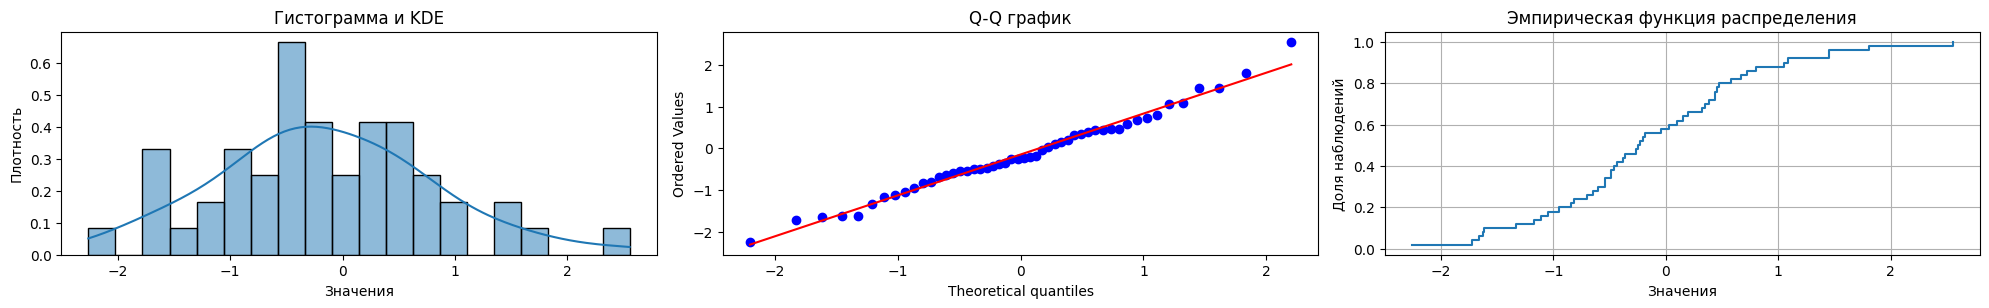




Объем выборки: 1000
Колмогорова-Смирнова: KstestResult(statistic=np.float64(0.022422791988880975), pvalue=np.float64(0.6873821316739217), statistic_location=np.float64(1.206260400809413), statistic_sign=np.int8(1))
Критерий Шапиро-Уилка: ShapiroResult(statistic=np.float64(0.9985320995597583), pvalue=np.float64(0.5757186935149123))
Критерий Андерсона-Дарлинга: AndersonResult(statistic=np.float64(0.4423331573498217), critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(0.0378521296663038), scale=np.float64(0.9882364875831646))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Критерий Крамера-фон Мизеса: CramerVonMisesResult(statistic=0.24551143629285987, pvalue=0.19423247824394085)
Критерий Колмогорова (Лиллиефорса): KstestResult(statistic=np.float64(0.022540077314789353), pvalue=np.float64(0.6811483452471481), statistic_location=np.float6

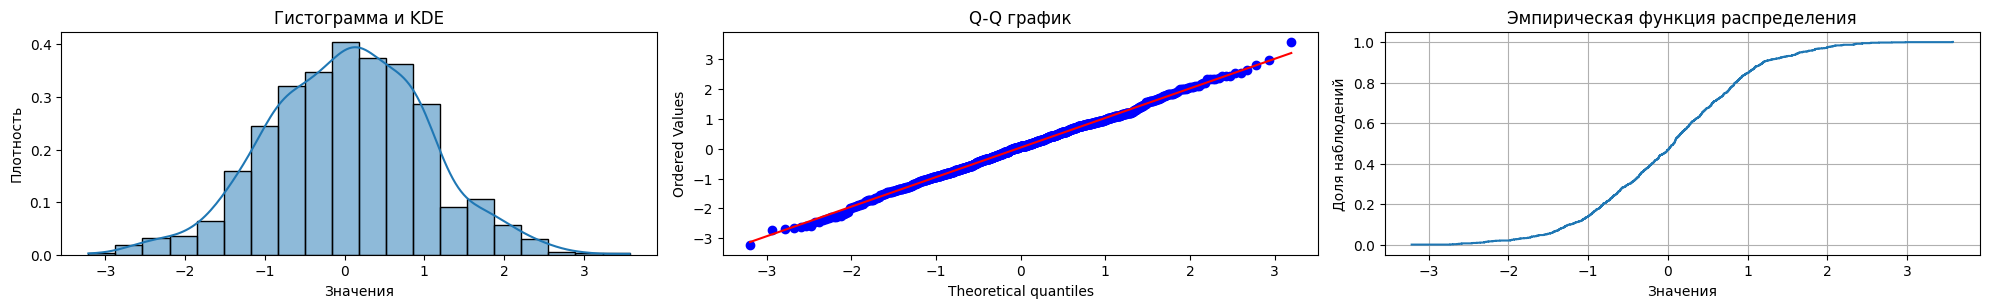





 Графики для mu = 100, sigma = 15 

Объем выборки: 50
Колмогорова-Смирнова: KstestResult(statistic=np.float64(0.09269915803944184), pvalue=np.float64(0.7485779241667161), statistic_location=np.float64(104.06869061449514), statistic_sign=np.int8(-1))
Критерий Шапиро-Уилка: ShapiroResult(statistic=np.float64(0.9841779795209449), pvalue=np.float64(0.7357715232104706))
Критерий Андерсона-Дарлинга: AndersonResult(statistic=np.float64(0.37635146308423373), critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(99.75743587221491), scale=np.float64(15.208166548850356))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Критерий Крамера-фон Мизеса: CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
Критерий Колмогорова (Лиллиефорса): KstestResult(statistic=np.float64(0.09159664550193936), pvalue=np.float64(0.76122822983

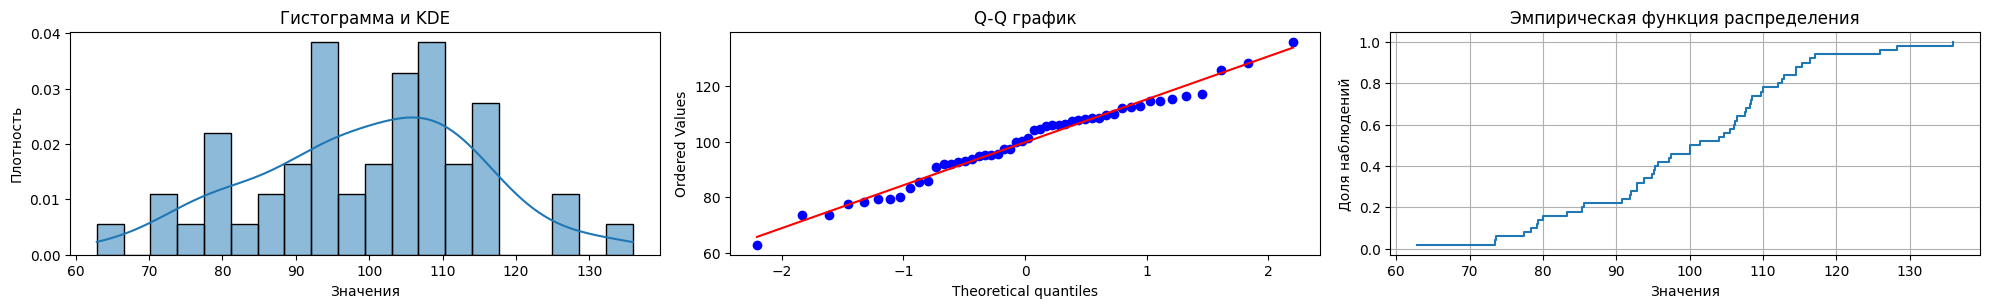




Объем выборки: 1000
Колмогорова-Смирнова: KstestResult(statistic=np.float64(0.01623692390535947), pvalue=np.float64(0.9507865890857964), statistic_location=np.float64(108.13794008461177), statistic_sign=np.int8(-1))
Критерий Шапиро-Уилка: ShapiroResult(statistic=np.float64(0.9984938433699614), pvalue=np.float64(0.5506245427761449))
Критерий Андерсона-Дарлинга: AndersonResult(statistic=np.float64(0.35603762696905505), critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(100.3336818082086), scale=np.float64(15.118327471502338))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Критерий Крамера-фон Мизеса: CramerVonMisesResult(statistic=333.3333333333333, pvalue=0)
Критерий Колмогорова (Лиллиефорса): KstestResult(statistic=np.float64(0.01614673758876517), pvalue=np.float64(0.9529695040287978), statistic_location=np.float64(108.13794008461177

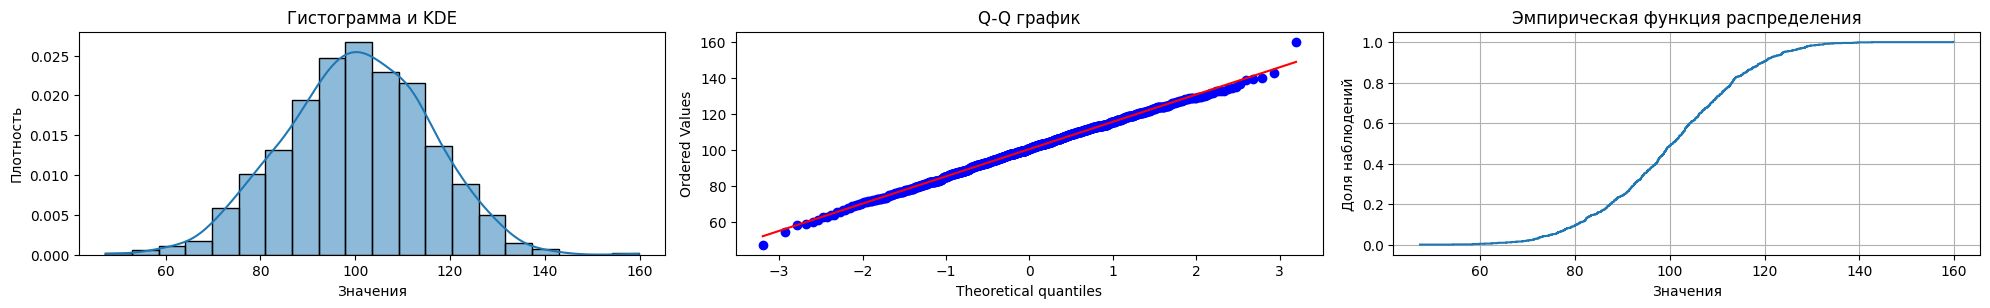

In [12]:
mu = 0
sigma = 1 
sizes = [50, 1000]
params = [[0,1], [100, 15]]
for mu, sigma in params:
    print(f'\n Графики для mu = {mu}, sigma = {sigma} \n')
    for sample_size in sizes:
        data = np.random.normal(mu, sigma, sample_size)
        normality_analysis(data, sample_size)
        print('\n\n')


Пример использования метода огибающих

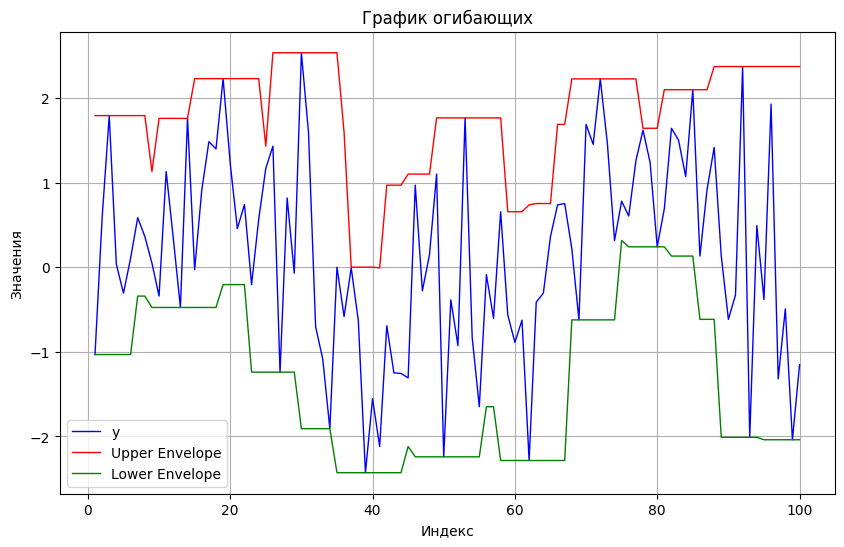

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(111)

n = 100
x = np.arange(1, n + 1)
y = np.random.normal(loc=0, scale=1, size=n) + np.sin(0.1 * x)

def rolling_max(series, window=10):
    return series.rolling(window=window, center=True).max()

def rolling_min(series, window=10):
    return series.rolling(window=window, center=True).min()

data = pd.DataFrame({'x': x, 'y': y})
data['upper'] = rolling_max(data['y'])
data['lower'] = rolling_min(data['y'])

data['upper'] = data['upper'].bfill().ffill()
data['lower'] = data['lower'].bfill().ffill()

plt.figure(figsize=(10, 6))
plt.plot(data['x'], data['y'], label='y', color='blue', linewidth=1)
plt.plot(data['x'], data['upper'], label='Upper Envelope', color='red', linewidth=1)
plt.plot(data['x'], data['lower'], label='Lower Envelope', color='green', linewidth=1)

plt.title('График огибающих')
plt.xlabel('Индекс')
plt.ylabel('Значения')
plt.legend()
plt.grid(True)
plt.show()


# Анализ столбца исходных данных с помощью графиков эмпирических функций распределений, квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности


 Графики для LONGITUDE
Объем выборки: 29451
Колмогорова-Смирнова: KstestResult(statistic=np.float64(0.11050685416093209), pvalue=np.float64(1.0742468555e-313), statistic_location=np.float64(13.234221), statistic_sign=np.int8(1))
Критерий Шапиро-Уилка: ShapiroResult(statistic=np.float64(0.9357009578022896), pvalue=np.float64(3.2749501171468907e-75))
Критерий Андерсона-Дарлинга: AndersonResult(statistic=np.float64(504.72412029384213), critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(21.300255165028354), scale=np.float64(6.205306453735163))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Критерий Крамера-фон Мизеса: CramerVonMisesResult(statistic=9805.003312385612, pvalue=0)
Критерий Колмогорова (Лиллиефорса): KstestResult(statistic=np.float64(0.11050307163889278), pvalue=np.float64(1.12877442907e-313), statistic_location=np.float64(13.2

c:\users\vesnuchka\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 29451.
  res = hypotest_fun_out(*samples, **kwds)
c:\users\vesnuchka\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_hypotests.py:395: RuntimeWarning: overflow encountered in scalar multiply
  e3 = 2 * (m + 2) * gamma(k + 3/2) * _ed3((4 * k + 5) / sx) / (12 * y2)
c:\users\vesnuchka\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_hypotests.py:393: RuntimeWarning: overflow encountered in scalar multiply
  e1 = m * gamma(k + 1/2) * _ed2((4 * k + 3)/sx) / (9 * y1)
c:\users\vesnuchka\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_hypotests.py:396: RuntimeWarning: overflow encountered in scalar multiply
  e4 = 7 * m * gamma(k + 1/2) * _ed2((4 * k + 1) / sx) / (144 * y1)
c:\users\vesnuchka\appdata\local\programs\python

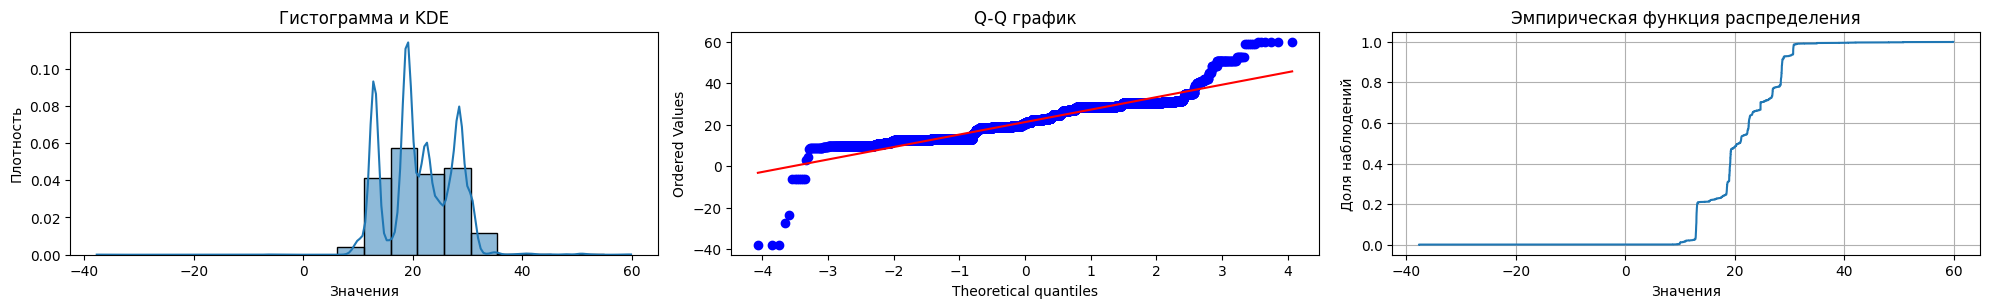

In [22]:

def distribution(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y


def normality_analysis(data, sample_size):
    print(f"Объем выборки: {sample_size}")
    
    tests = {
        "Колмогорова-Смирнова": stats.kstest(data, 'norm', args=(np.mean(data), np.std(data))),
        "Критерий Шапиро-Уилка": stats.shapiro(data),
        "Критерий Андерсона-Дарлинга": stats.anderson(data, dist='norm'),
        "Критерий Крамера-фон Мизеса": stats.cramervonmises(data, 'norm'),
        "Критерий Колмогорова (Лиллиефорса)": stats.kstest(data, 'norm', args=(np.mean(data), np.std(data, ddof=1))),
        "Критерий Колмогорова (Шапиро-Франсия)": stats.kstest(data, 'norm', args=(np.mean(data), stats.tstd(data))),
    }
    
    for name, result in tests.items():
        print(f"{name}: {result}")
    
    plt.figure(figsize=(20, 14))
    
    plt.subplot(5, 3, 1)
    sns.histplot(data, kde=True, stat='density', bins=20)
    plt.title('Гистограмма и KDE')
    plt.xlabel('Значения')
    plt.ylabel('Плотность')
    
    plt.subplot(5, 3, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title('Q-Q график')

    x, y = distribution(data)
    plt.subplot(5, 3, 3)
    plt.step(x, y, where='post')
    plt.title('Эмпирическая функция распределения')
    plt.xlabel('Значения')
    plt.ylabel('Доля наблюдений')
    plt.grid()
    
    plt.tight_layout()
    plt.show()



print(f'\n Графики для LONGITUDE')
normality_analysis(df['LONGITUDE'], len(df['LONGITUDE']))


### Все тесты для столбца LONGITUDE исходного датафрейма показали, что данные в нём распределены не нормально. Графики показывают то же самое